### Package Import

In [1]:
# Calculation
import numpy as np
import re

# Chinese NLP
import jieba
import stopwordsiso
from stopwordsiso import stopwords

# Showing Result
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE

# Vectorizer, LSA, LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

# Visualization
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt

# Word Vector
import nltk
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import Word2Vec
import codecs

# HTML Parser
from bs4 import BeautifulSoup

### Make Document from dataset

In [551]:
# Code referenced & edited from NLP-Week-4.1-Task

#Read back in
file_name = "Dataset/DOUBAN_dataset_group01"
post_df = pd.read_csv(file_name + ".tsv",sep = "\t", usecols = ["title","link","main text","reply text"])

In [552]:
douban_all_text = []
for index in range(len(post_df)):
    #add title
    all_text = "" + str(post_df.iloc[index][0])
    #add main text
    for main in post_df.iloc[index][2]:
        all_text = all_text + str(main)
    for reply in post_df.iloc[index][3]:
        all_text = all_text + str(reply)
    douban_all_text.append(all_text)

### Whole corpus analysing (BOW, mean token)

In [493]:
from collections import Counter
douban_all_text_token = []
for every_post in douban_all_text:
    douban_all_text_token.append(Chinese_tokeniser(every_post))

douban_all_text_token_all = []

for token in douban_all_text_token:
    for word in token:
        douban_all_text_token_all.append(word)

bow = Counter(douban_all_text_token_all)
#pd.DataFrame(bow.most_common(40), columns = ["keyword","Frequence"]).to_csv("Top40bow group03.tsv",sep = "\t" , index = False)
bow

In [473]:
douban_all_text_token = []
for every_post in douban_all_text:
    douban_all_text_token.append(Chinese_tokeniser(every_post))
a = 0
for i in range(17):
    a = a + len(douban_all_text_token[i])
print(a/17)

107.29411764705883


### Make Chinese_tokeniser

In [492]:
# Code referenced & edited from NLP-Week2.1-Lecture

def Chinese_tokeniser(doc):
    #Split on spaces
    tokens_re = re.sub(r"[\[\],，:'\\n\s.\"“”…()（）\【\】\】]"," ",doc)
    tokens = jieba.lcut(tokens_re)
    processed = []
    for t in tokens:
        #Remove Chinese stop words
        if not t in stopwords("zh") and t != " ":
            processed = processed + [t]
    #Return an array of tokens for that document
    return processed

### Bag of Words Top Tokens

In [390]:
#Code referenced & edited from NLP-Week2.1-Task

#Create count vectors
vectoriser = CountVectorizer(min_df=1, tokenizer = Chinese_tokeniser )
vectorised = vectoriser.fit_transform(douban_all_text)
print(vectorised.todense().shape)

(30, 3334)


In [391]:
#Code referenced & edited from NLP-Week2.1-Task

#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab_ = vectoriser.get_feature_names()
data_ = pd.DataFrame(vectorised.todense(), columns = vocab_)

bow_present = pd.DataFrame(columns = ["doc","BoW_top_tokens"]) # code by myself

for i in range(len(vectorised.todense())):
    post_tokens = data_.iloc[i].sort_values(ascending = False).head(num_words)
    #rest code by myself
    post_tokens_list = []
    for every_token in post_tokens.index:
        post_tokens_list.append(str(every_token))
    bow_present = bow_present.append(pd.DataFrame([[str(i),post_tokens_list]] , columns = ["doc","BoW_top_tokens"]))

bow_present

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,doc,BoW_top_tokens
0,0,"[工作, —, 科长, 同事, 财务科, 找, 喝酒, 电话, 觉得, 辞职]"
0,1,"[pua, 本书, 书, 小组, 推荐, 遭到, 买, 严重, 一本, 反]"
0,2,"[父母, 知道, 我爸, 想, 觉得, 骂, 这种, 认识, 我家, 走]"
0,3,"[pua, 前女友, 虐待, 女性, 社会, 伤害, 欺骗, 多次, 控制, 处女]"
0,4,"[父母, pua, 挑, 没面子, 尽力, 喜欢, 砸, 不想, 离开, 默默]"
0,5,"[屏蔽, 朋友圈, 气, 越, 直接, 照片, 知道, 我哥, 发, 回复]"
0,6,"[关系, 生气, 没有, 搞, 道歉, 远离, 屁事, 天天, 示好, pua]"
0,7,"[写, 考试, 笑, 没, 东西, 不会, 一次, 下课, 乱七八糟, 嘲笑]"
0,8,"[访谈, pua, 经历, 寻求, 請, 使用, 隱私, 注意, 利用, 想]"
0,9,"[集体主义, 典型, pua, 案例, 个人, 觉得, 洗过, 沼泽, 没能, 没见识]"


In [115]:
#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab = vectoriser.get_feature_names()
data = pd.DataFrame(vectorised.todense(), columns = vocab)
for i in range(len(vectorised.todense())):
    #print("doc", i)
    print(data.iloc[i].sort_values(ascending = False).head(num_words))

工作     18
—      17
科长     13
同事     11
财务科    10
找       9
喝酒      8
电话      7
觉得      7
辞职      7
Name: 0, dtype: int64
pua    2
完      1
本书     1
一本     1
书      1
买      1
最近     1
小组     1
推荐     1
遭到     1
Name: 1, dtype: int64
父母    15
知道    10
觉得     9
我爸     9
想      9
骂      8
这种     7
没有     5
钱      5
我家     5
Name: 2, dtype: int64
pua    5
虐待     4
社会     4
前女友    4
女性     4
辱骂     3
不放过    3
欺骗     3
处女     3
控制     3
Name: 3, dtype: int64
父母     5
pua    3
挑      3
默默     2
每次     2
尽力     2
一下     2
喜欢     2
离开     2
一直     2
Name: 4, dtype: int64
屏蔽     7
朋友圈    5
知道     4
照片     4
气      4
越      4
直接     4
解释     3
发      3
我哥     3
Name: 5, dtype: int64
关系     6
生气     5
道歉     4
搞      4
没有     4
屁事     3
pua    3
示好     3
天天     3
远离     3
Name: 6, dtype: int64
写     6
考试    4
一次    3
笑     3
没     3
下课    3
不会    3
东西    3
上课    2
负面    2
Name: 7, dtype: int64
访谈     4
pua    3
寻求     2
经历     2
研究生    1
保密     1
欢迎     1
谢谢     1
想      1
惡意     1
Name: 8, dtype

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### TF/IDF Top Tokens

In [553]:
#Code referenced & edited from NLP-Week2.1-Task

#Using the TFIDF Vectorizer to get TFIDF vectors with custom tokeniser
vectoriser = TfidfVectorizer(tokenizer=Chinese_tokeniser)
vectorised = vectoriser.fit_transform(douban_all_text)
print(vectorised.todense().shape)

(30, 2319)


In [554]:
#Code referenced & edited from NLP-Week2.1-Task

#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab_ = vectoriser.get_feature_names()
data_ = pd.DataFrame(vectorised.todense(), columns = vocab_)

tfidf_present = pd.DataFrame(columns = ["doc","tf/idf_top_tokens"]) # code by myself

for i in range(len(vectorised.todense())):
    post_tokens = data_.iloc[i].sort_values(ascending = False).head(num_words)
    #rest code by myself
    post_tokens_list = []
    for every_token in post_tokens.index:
        post_tokens_list.append(str(every_token))
    tfidf_present = tfidf_present.append(pd.DataFrame([[str(i),post_tokens_list]] , columns = ["doc","tf/idf_top_tokens"]))

tfidf_present

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,doc,tf/idf_top_tokens
0,0,"[一毛, 主动, 女, 套路, 关系, 最后, 领导, 对谈, 子, 令]"
0,1,"[同级, 同事, 哈哈哈, 遭遇, 相同, pua, 经历, 🤢, 呦, 指使]"
0,2,"[干, 工作, 觉得, 会计, 同事, 领导, 工资, 忙, 一直, 应该]"
0,3,"[不想, 该不该, 尚可, 扯淡, 组里, 透露, 逃跑, 逃离, 受够了, 回报]"
0,4,"[话题, 返, 创建, 启迪, 记, 记录, 组长, 哈哈哈, 成功, 需要]"
0,5,"[半年, 领导, 方向, 不错, 内容, 怀疑, 每天, 非常, 真的, 面试]"
0,6,"[觉得, 客户, 半年, 渣, 运气, 情绪, 绩效, 一无是处, 加油, 之前]"
0,7,"[工作, 目前, 最好, 走路, 更好, 找到, 应该, 不到, 残疾, 是否是]"
0,8,"[绩效, 狗, 领导, 否定, 一点, 搞, 还给, 压低, 实现, 多倍]"
0,9,"[人事, 说实话, 公司, 后来, 过度, ੭, 送到, 排斥, 觉得, 当时]"


In [350]:
#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab = vectoriser.get_feature_names()
data = pd.DataFrame(vectorised.todense(), columns = vocab)
for i in range(len(vectorised.todense())):
    #print("doc", i)
    print(data.iloc[i].sort_values(ascending = False).head(num_words))

       0.907232
—      0.146889
科长     0.137873
工作     0.108769
财务科    0.106056
同事     0.088087
喝酒     0.069124
辞职     0.066193
电话     0.052437
单位     0.043203
Name: 0, dtype: float64
      0.614686
一本    0.287430
推荐    0.287430
遭到    0.287430
本书    0.256276
书     0.256276
反     0.217026
小组    0.203018
完     0.191173
最近    0.191173
Name: 1, dtype: float64
        0.955315
我爸      0.078689
父母      0.075486
骂       0.046201
知道      0.039855
鬼鬼祟祟    0.038634
耳机      0.038634
蟑螂      0.038634
我家      0.036464
想       0.035870
Name: 2, dtype: float64
       0.560725
前女友    0.154517
虐待     0.154517
欺骗     0.153482
不放过    0.153482
女性     0.144543
社会     0.144543
处女     0.136846
多次     0.125043
辱骂     0.125043
Name: 3, dtype: float64
       0.853446
挑      0.123764
父母     0.120539
尽力     0.092539
砸      0.092539
没面子    0.092539
默默     0.092539
近几年    0.092539
#      0.082509
多次     0.075393
Name: 4, dtype: float64
       0.848506
屏蔽     0.217832
朋友圈    0.117483
照片     0.110984
越      0.110984


/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LSA

In [295]:
#Code referenced & edited from NLP-Week2.2-Lecture

tfidf_vectoriser = TfidfVectorizer(tokenizer=Chinese_tokeniser)
tfidf_docs = tfidf_vectoriser.fit_transform(raw_documents=douban_all_text).toarray()
column_nums, terms = zip(*sorted(zip(tfidf_vectoriser.vocabulary_.values(), tfidf_vectoriser.vocabulary_.keys()))) # Get the column_numbers for each term in our vocabulary
tfidf_docs_df = pd.DataFrame(tfidf_docs, columns=terms)
#tfidf_docs_df #show it

In [374]:
topic_num_lsa = 20
n_iter = 100

#Code referenced & edited from NLP-Week2.2-Lecture

tfidf_docs_df = tfidf_docs_df - tfidf_docs_df.mean() #Centres vectorized documents by subtracting the mean
svd = TruncatedSVD(n_components = topic_num_lsa, n_iter = n_iter) 
svd_topic_vectors = svd.fit_transform(tfidf_docs_df.values)
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=['topic{}'.format(i) for i in range(topic_num_lsa)])
#svd_topic_vectors_df
topic_weights = pd.DataFrame(svd.components_.T, index=terms, columns=['topic{}'.format(i) for i in range(topic_num_lsa)])
#topic_weights #display it

In [375]:
topic_present = pd.DataFrame(columns = ["","LSA " + str(topic_num_lsa) + " topics" 
                                                                 + " (n_iter=" + str(n_iter) + ")"]) # code by myself

#Code referenced & edited from NLP-Week2.2-Lecture

#Do this for all topics
for i in range(topic_num_lsa):
    topicName = "topic" + str(i)
    LDA_topics = topic_weights.get(topicName).sort_values(ascending=False)[:10]
    #rest code by myself
    LDA_topics_list = []
    for every_topic in LDA_topics.index:
        LDA_topics_list.append(str(every_topic))
    topic_present = topic_present.append(pd.DataFrame([[str(i),LDA_topics_list]] , 
                                                      columns = ["","LSA " + str(topic_num_lsa) + " topics" 
                                                                     + " (n_iter=" + str(n_iter) + ")"]))

topic_present

,,LSA 20 topics (n_iter=100)
0,0,"[访谈, 集体主义, 案例, pua, 典型, 使用, 放手, 删, 女性, 寻求]"
0,1,"[父母, 独立, 伴侣, 我爸, 一段, 本位, 思想, 依赖, 是否, 不会]"
0,2,"[女孩子, 屏蔽, 删, 放手, 骂, 分手, 舒服, 照片, 对象, 走人断]"
0,3,"[辱骂, 父母, 经历, 社会, 屏蔽, 朋友, 生活, 控制, 骂, 贬低]"
0,4,"[结婚, 同居, 两, 改不了, 交流, 计划, 删, 放手, 现在, 不好]"
0,5,"[女孩子, 分手, 妈, pua, 不要, 钱, 女性, 一方, 男, 多次]"
0,6,"[妈, 关系, 独立, 情绪, 广告, 在乎, 伴侣, 垃圾, 远离, 生气]"
0,7,"[放手, 删, 舒服, 分明, 特质, 不愿, 那就算了, 感到, 不想, 男]"
0,8,"[女孩子, 分手, 骂, 难听, 大不了, 摆在, 走人断, 第一位, 结婚, 对象]"
0,9,"[一本, 推荐, 遭到, 书, 反, 本书, 完, 严重, 小组, 买]"


### LDA

In [485]:
topic_num_lda = 10

#Code referenced & edited from NLP-Week2.2-Lecture

# Set things up
lda_cv = CountVectorizer(tokenizer=Chinese_tokeniser,
                        max_df=.1,
                        max_features=5000)
count_data = lda_cv.fit_transform(douban_all_text)
lda = LatentDirichletAllocation(n_components=topic_num_lda,
                                random_state=123,
                                learning_method='batch')

In [486]:
#Code referenced & edited from NLP-Week2.2-Lecture

# And run LDA. This could take a loooonggggg time....
lda_topics = lda.fit_transform(count_data)
#Now make a friendly data frame from the topics and display it
lda_topic_vectors_df = pd.DataFrame(lda_topics, columns=['topic{}'.format(i) for i in range(topic_num_lda)])
#lda_topic_vectors_df

In [334]:
lda_topic_vectors_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.998101
1,0.016668,0.016667,0.016667,0.016667,0.849998,0.016667,0.016667,0.016667,0.016667,0.016667
2,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.997097,0.000323
3,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.994231,0.000641,0.000641,0.000641
4,0.001191,0.001190,0.001191,0.001191,0.989285,0.001190,0.001191,0.001190,0.001191,0.001190
5,0.000870,0.000870,0.992174,0.000870,0.000870,0.000870,0.000870,0.000870,0.000870,0.000870
6,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.991000,0.001000,0.001000
7,0.000704,0.000704,0.000704,0.000704,0.000704,0.000704,0.000704,0.000704,0.993662,0.000704
8,0.003704,0.003704,0.966666,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704,0.003704
9,0.014286,0.014286,0.014286,0.014286,0.871429,0.014286,0.014286,0.014286,0.014286,0.014286


In [489]:
topic_present = pd.DataFrame(columns = ["","LDA " + str(topic_num_lda)+" topics"]) # code by myself

#Code referenced & edited from NLP-Week2.2-Lecture
#Do this for all topics
n_top_words = 30
feature_names = lda_cv.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    LSA_topics = [feature_names[i_]
                    for i_ in topic.argsort()\
                        [:-n_top_words - 1:-1]]
    #rest code by myself
    topic_present = topic_present.append(pd.DataFrame([[str(topic_idx),LSA_topics]] , columns = ["","LDA " + str(topic_num_lda)+" topics"]))

topic_present

topic_present.to_csv("results" + ".tsv", sep = "\t", columns = ["","LDA " + str(topic_num_lda)+" topics"], index = False)

### t-SNE (within document)

In [403]:
# Code referenced from : https://towardsdatascience.com/texts-fonts-and-annotations-with-pythons-matplotlib-dfbdea19fc57
font_path = "Plot_Font/SourceHanSansCN-Normal.otf"
prop = fm.FontProperties(fname = font_path)

In [555]:
# Code referenced & edited from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop,
                     size=12)
        
    # Code referenced from : https://towardsdatascience.com/texts-fonts-and-annotations-with-pythons-matplotlib-dfbdea19fc57
    # TITLE
    plt.suptitle('t-SNE Visualization', x=0.125, y=0.92, ha='left', fontsize=18)
    # SUBTITLE
    plt.title('within document', loc='left', fontsize=14)
    # Ending Code reference
    
    plt.show()

In [556]:
douban_all_text_token = []
for every_post in douban_all_text:
    douban_all_text_token.append(Chinese_tokeniser(every_post))

162


/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


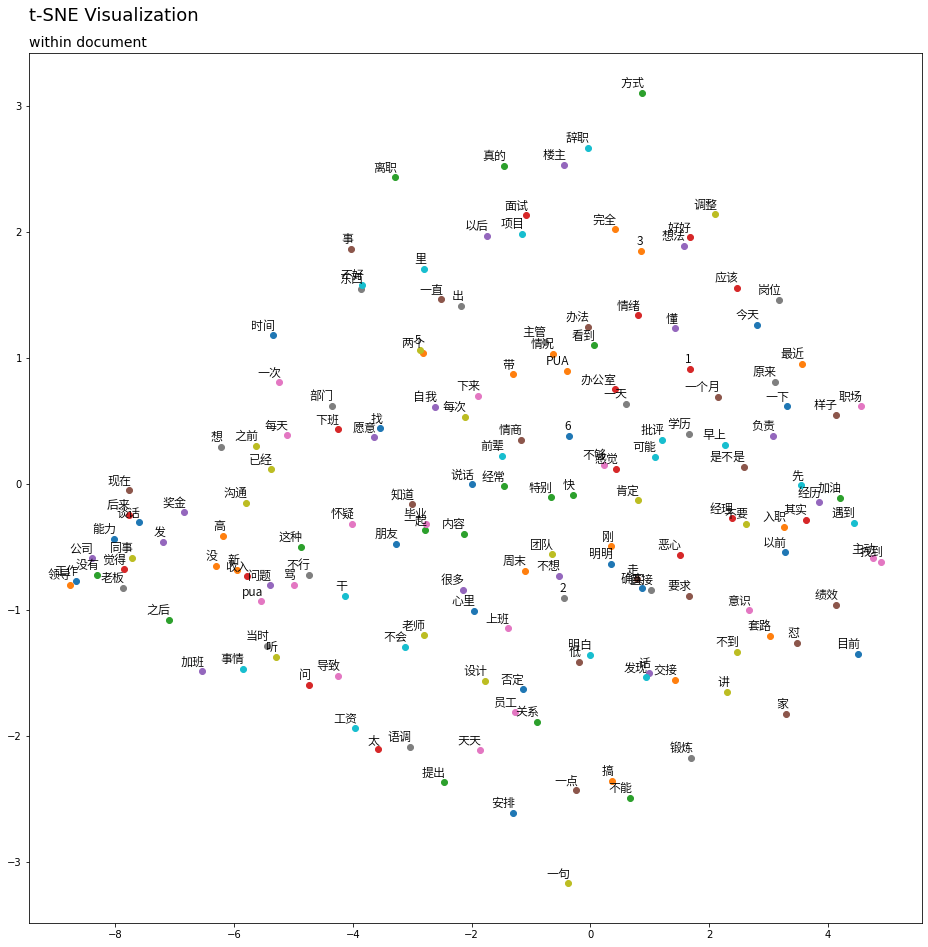

In [571]:
# Code referenced & edited from NLP-Week-4.2-Task
model = Word2Vec(douban_all_text_token, workers=4, vector_size=300, min_count=6, window=10, sample=1e-3)
print(len(model.wv))
# Plot the tSNE!
tsne_plot(model)

### Chinese Word Embeddings

Shen Li, Zhe Zhao, Renfen Hu, Wensi Li, Tao Liu, Xiaoyong Du, Analogical Reasoning on Chinese Morphological and Semantic Relations, ACL 2018.

@InProceedings{P18-2023,
  author =  "Li, Shen
    and Zhao, Zhe
    and Hu, Renfen
    and Li, Wensi
    and Liu, Tao
    and Du, Xiaoyong",
  title =   "Analogical Reasoning on Chinese Morphological and Semantic Relations",
  booktitle =   "Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers)",
  year =  "2018",
  publisher =   "Association for Computational Linguistics",
  pages =   "138--143",
  location =  "Melbourne, Australia",
  url =   "http://aclweb.org/anthology/P18-2023"
}

In [435]:
#Word Embedding from: https://github.com/Embedding/Chinese-Word-Vectors
#Code from NLP-Week_4.2-Word2Vec

#Run this every time you run the notebook (if working on your own computer)
embeddings_file = "sgns.weibo.word.bz2"
#This line will load the 200,000 most common words into wv, a variable of word vectors
#Note that this will load these into memory, so if you don't have a lot of memory on your computer you may run into problems/slowness
wv = KeyedVectors.load_word2vec_format(embeddings_file, binary=False, limit=300000)

### t-SNE mapping to Chinese Word Embeddings

In [564]:
wv_model = []
for i in range(len(tfidf_present)):
    for word in tfidf_present.iloc[i][1]:
        if word not in wv_model:
            wv_model.append(word)

In [548]:
#Code referenced & edited from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

#Modified for existing Chinese Word Embeddings
def tsne_plot_modified(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in wv_model:
        if word in wv.index_to_key:
            tokens.append(wv[word])
            labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(22, 22)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop,
                     size=10)
        
    # Code from : https://towardsdatascience.com/texts-fonts-and-annotations-with-pythons-matplotlib-dfbdea19fc57
    # TITLE
    plt.suptitle('t-SNE Visualization', x=0.125, y=0.92, ha='left', fontsize=18)
    # SUBTITLE
    plt.title('all token mapping to Chinese Word Embeddings', loc='left', fontsize=14)
    # Ending reference
    
    plt.show()

In [565]:
len(wv_model)

262

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


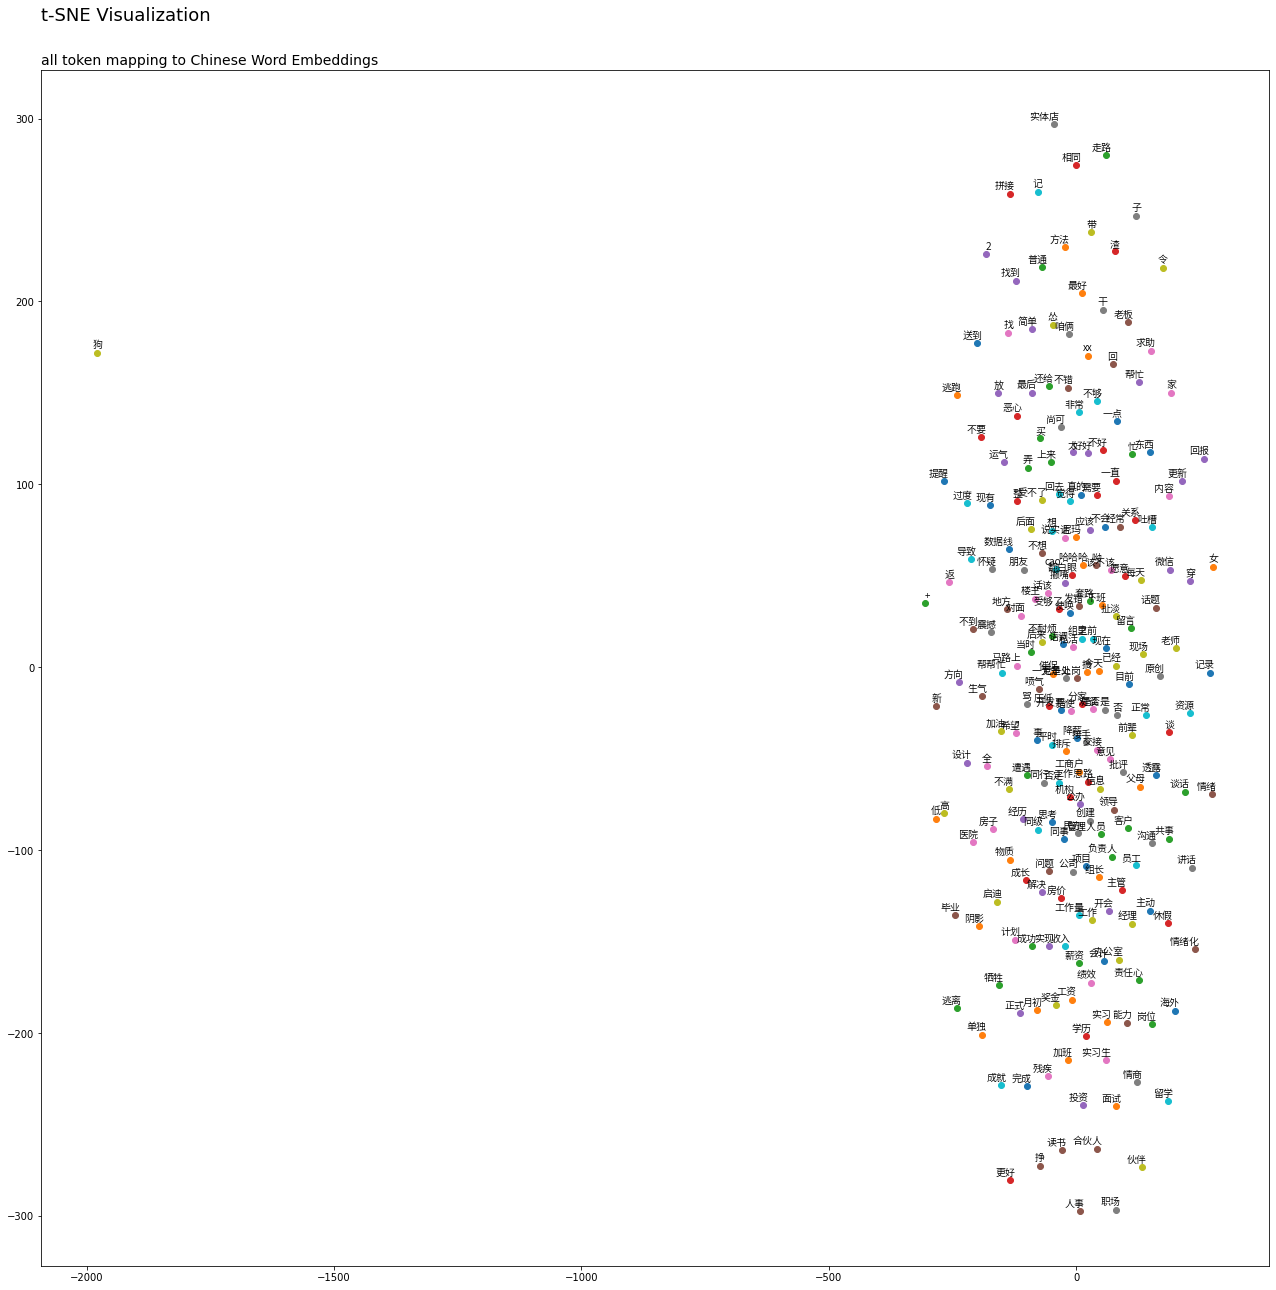

In [566]:
tsne_plot_modified(wv_model)

### Cosine Similarity

In [498]:
#Code referenced from NLP-Week_2.1-Task

#Convert to array 
vector_array = vectorised.todense()
#Find similarities
result = cosine(vector_array)
#Put the result in a dataframe and 
df = pd.DataFrame(result)
#Show with heatmap style gradients
df.style.background_gradient(cmap='Greens')

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.008266,0.102382,0.023795,0.050673,0.047845,0.078302,0.048118,0.008601,0.010306,0.050874,0.062498,0.072607,0.029317,0.158137,0.030508,0.133458,0.013426,0.153295,0.117584,0.074937,0.064675,0.180205,0.102230,0.050099,0.127364,0.020532,0.076599,0.051426,0.048061
1,0.008266,1.000000,0.045327,0.050885,0.043418,0.006533,0.012130,0.014688,0.025516,0.031911,0.039972,0.012865,0.028361,0.005326,0.020411,0.023453,0.018366,0.027850,0.051145,0.049213,0.021008,0.016596,0.027964,0.073542,0.034141,0.046290,0.013794,0.019762,0.016982,0.015608
2,0.102382,0.045327,1.000000,0.043067,0.109685,0.059242,0.053769,0.070611,0.011614,0.016335,0.062838,0.118049,0.157055,0.055132,0.219511,0.041985,0.107802,0.026501,0.182880,0.122496,0.109818,0.056406,0.129439,0.096802,0.076818,0.127465,0.006868,0.098144,0.051378,0.069255
3,0.023795,0.050885,0.043067,1.000000,0.052812,0.009370,0.040613,0.024404,0.026253,0.013527,0.079441,0.075129,0.019586,0.014667,0.029680,0.004815,0.034670,0.054906,0.045501,0.041844,0.017373,0.040057,0.042776,0.074734,0.022970,0.015944,0.005847,0.048589,0.070642,0.021983
4,0.050673,0.043418,0.109685,0.052812,1.000000,0.041884,0.010666,0.039918,0.032951,0.052204,0.044239,0.072062,0.064012,0.016455,0.132680,0.027259,0.019811,0.015482,0.057225,0.036941,0.026939,0.035343,0.072534,0.084661,0.047430,0.053392,0.026510,0.043233,0.027454,0.005704
5,0.047845,0.006533,0.059242,0.009370,0.041884,1.000000,0.050355,0.026314,0.018260,0.005150,0.023139,0.069627,0.009570,0.038576,0.042863,0.018933,0.043335,0.004494,0.057027,0.047557,0.052067,0.021365,0.061179,0.038993,0.013587,0.032152,0.002226,0.044348,0.035667,0.004581
6,0.078302,0.012130,0.053769,0.040613,0.010666,0.050355,1.000000,0.049534,0.016456,0.012445,0.054949,0.063840,0.033376,0.021181,0.054323,0.043395,0.054125,0.026146,0.099258,0.080862,0.077192,0.038839,0.107216,0.128181,0.038106,0.050289,0.027215,0.091469,0.062908,0.047489
7,0.048118,0.014688,0.070611,0.024404,0.039918,0.026314,0.049534,1.000000,0.023973,0.015363,0.040122,0.033335,0.031283,0.039082,0.052964,0.058179,0.042984,0.010106,0.095279,0.109825,0.046036,0.020928,0.111784,0.054448,0.053780,0.063227,0.012207,0.075779,0.027460,0.007514
8,0.008601,0.025516,0.011614,0.026253,0.032951,0.018260,0.016456,0.023973,1.000000,0.020112,0.042462,0.021872,0.017055,0.006252,0.020591,0.007159,0.027659,0.058233,0.021291,0.024690,0.007735,0.024448,0.027870,0.040781,0.033254,0.010281,0.008694,0.032649,0.056144,0.018358
9,0.010306,0.031911,0.016335,0.013527,0.052204,0.005150,0.012445,0.015363,0.020112,1.000000,0.035290,0.012435,0.007789,0.004198,0.003023,0.008953,0.020935,0.021951,0.017540,0.025897,0.006638,0.015449,0.009188,0.053815,0.051264,0.019824,0.010872,0.008541,0.007623,0.017869
